# **QAI for Digital Society Demo**

Colab-ready Python script:

1) Framework Initialization (QAI, Society 5.0, NIST, UN SDG, etc.)

2) QAI CPS Systems Setup (SafetyBot, HealthCPS, TransportCPS, ID Verification)

3) Daily Simulation for Aarti (hourly events, responses, interventions)

4) Field Logs (what happened, when, where, how)

5) KPIs & Charts (safety, productivity, service, crime reduction, satisfaction)

=== Parent Frameworks Loaded ===

ORG FRAMEWORK: {
  "Name": "Bhadale IT Hub - Org Framework",
  "Roles": [
    "City Authority (Controller)",
    "Startup (Operator/Contractor)",
    "Contractors",
    "Citizen Council"
  ],
  "Governance": [
    "Responsible AI Board",
    "Privacy Officer",
    "Incident Response Team"
  ],
  "Purpose": "Defines authority, accountability, procurement gates and public oversight."
}

OPS FRAMEWORK: {
  "Name": "16 Ops Framework (summary)",
  "Ops": [
    "CloudOps",
    "DevOps",
    "MLOps",
    "RoboOps",
    "SecOps",
    "ResearchOps",
    "DataOps",
    "FederalOps",
    "SustainOps",
    "ServiceOps",
    "SupportOps",
    "TestOps",
    "QAOps",
    "InfraOps",
    "ComplianceOps",
    "MonitoringOps"
  ],
  "Purpose": "Operationalizes running, updating, securing and certifying QAI services."
}

BUSINESS TRANSFORMATION: {
  "Name": "Business Transformation Framework",
  "Phases": [
    "Assessment",
    "Pilot",
    "Scale",
    "Governance Han

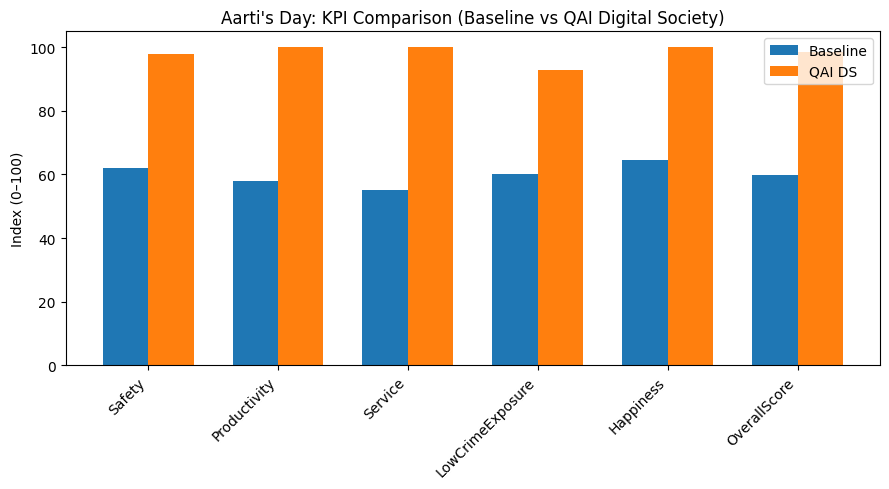

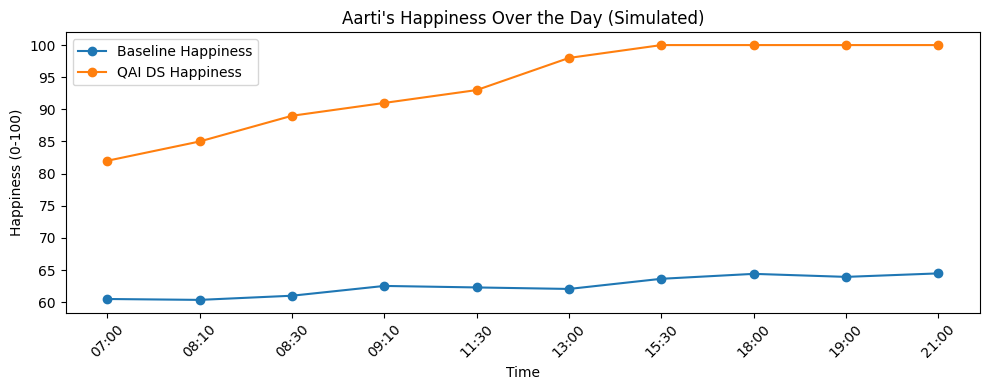

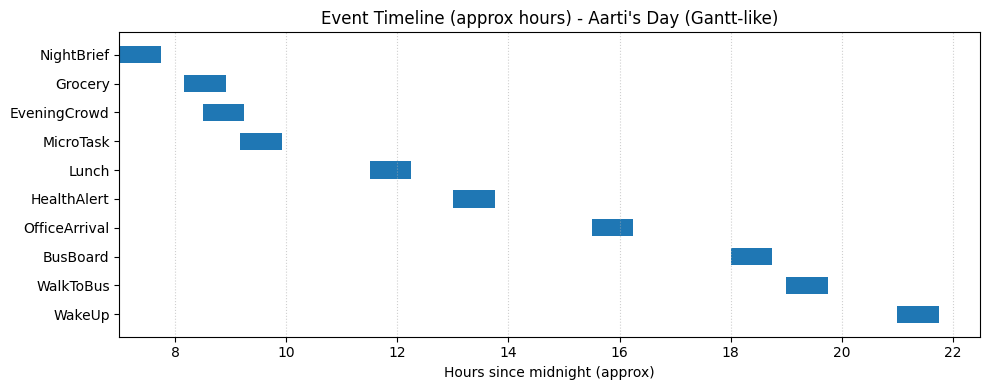


=== Short Demo Narrative ===

Parent frameworks (Org, Ops, Business Transformation) govern policy, operations, and rollout.
CPS Systems (SafetyBot, HealthCPS, TransportCPS, ID_Verify, ServiceCPS) are configured under Ops.
During the day, QAI-enabled CPS provide verified, fast services to Aarti; outcomes logged above.
KPIs show improvements in Safety, Productivity, Service and Happiness compared to baseline.

You can share the CSV and Markdown report from the Colab working directory:
- /content/Aarti_Day_Demo_KPIs.csv
- /content/Aarti_Day_Demo_Report.md


In [3]:
# QAI Digital Society - End-to-End Demo Simulation (Colab-ready)
# Combines: Parent Frameworks (Org, Ops, Business Transformation),
# QAI CPS Systems, Aarti's full-day scenario, Field logs, KPIs and Charts.
#
# Run in a single Colab cell. Uses matplotlib (one plot per figure) and pandas.

import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass, field
from typing import List, Dict
from datetime import datetime, timedelta
from textwrap import dedent
import json
import os

# -------------------------
# Determinism
# -------------------------
random.seed(42)
np.random.seed(42)

# -------------------------
# 0. Utility helpers
# -------------------------
def clamp01(x):
    return max(0.0, min(1.0, x))

def time_from_label(label, base_date=datetime(2025,8,25)):
    # label like "08:00" or "08:00+15m"
    return datetime.combine(base_date.date(), datetime.strptime(label.split('+')[0], "%H:%M").time())

def save_text(path, txt):
    with open(path, "w", encoding="utf-8") as f:
        f.write(txt)

# -------------------------
# 1. Parent Frameworks Initialization
# -------------------------
ORG_FRAMEWORK = {
    "Name": "Bhadale IT Hub - Org Framework",
    "Roles": ["City Authority (Controller)", "Startup (Operator/Contractor)", "Contractors", "Citizen Council"],
    "Governance": ["Responsible AI Board", "Privacy Officer", "Incident Response Team"],
    "Purpose": "Defines authority, accountability, procurement gates and public oversight."
}

OPS_FRAMEWORK = {
    "Name": "16 Ops Framework (summary)",
    "Ops": [
        "CloudOps", "DevOps", "MLOps", "RoboOps", "SecOps", "ResearchOps", "DataOps",
        "FederalOps", "SustainOps", "ServiceOps", "SupportOps", "TestOps", "QAOps",
        "InfraOps", "ComplianceOps", "MonitoringOps"
    ],
    "Purpose": "Operationalizes running, updating, securing and certifying QAI services."
}

BUS_TRANSFORMATION = {
    "Name": "Business Transformation Framework",
    "Phases": ["Assessment", "Pilot", "Scale", "Governance Handover"],
    "Deliverables": ["Migration Plan", "SDG Alignment", "Cost/Benefit", "Procurement SOWs"]
}

# Standards/ethics mapping
STANDARDS = {
    "Society5.0": "Human-centric cyber-physical integration",
    "NIST_AI_RMF": "Risk management for AI systems",
    "ISO_42001": "AI management system",
    "IEEE_7000": "Ethically aligned design guidance",
    "ISO_27001": "Information security",
    "W3C_VC_DID": "Verifiable Credentials & Decentralized Identifiers",
    "UN_SDGs": ["Good Health", "Sustainable Cities", "Reduced Inequalities", "Climate Action"]
}

print("=== Parent Frameworks Loaded ===\n")
print("ORG FRAMEWORK:", json.dumps(ORG_FRAMEWORK, indent=2))
print("\nOPS FRAMEWORK:", json.dumps(OPS_FRAMEWORK, indent=2))
print("\nBUSINESS TRANSFORMATION:", json.dumps(BUS_TRANSFORMATION, indent=2))
print("\nSTANDARDS MAPPING:", json.dumps(STANDARDS, indent=2))
print("\n")

# -------------------------
# 2. QAI CPS Systems & Tech Stack (mock configs)
# -------------------------
CPS_SYSTEMS = {
    "QAI_Datacenter": {
        "functions": ["Model orchestration", "Credential registry (VC/DID)", "Audit logs", "Policy engine"],
        "tech": ["QAI Processor (hybrid)", "Hybrid Cloud/Edge", "Blockchain ledger (permissioned)", "HSM + PQC roadmap"]
    },
    "SafetyBot": {
        "functions": ["Anomaly detection", "Crowd monitoring", "Emergency triage routing"],
        "tech": ["Edge Vision AI", "5G/6G", "IEC 62443 OT security", "ISO 13482 safety"]
    },
    "HealthCPS": {
        "functions": ["Wearable alert ingestion", "Teletriage", "Med-kit dispatch drones"],
        "tech": ["Medical device certification patterns", "HIPAA-like PII controls", "NLP triage models"]
    },
    "TransportCPS": {
        "functions": ["Real-time route optimization", "Traffic light RL", "Microtransit dispatch"],
        "tech": ["Digital Twin", "Reinforcement Learning", "ISO 37120 KPIs"]
    },
    "ID_Verify": {
        "functions": ["VC/mDL verification", "Age proof selective disclosure", "Offline verification for kiosks"],
        "tech": ["W3C VC/DID", "WebAuthn/FIDO2", "ISO/IEC 18013-5 mDL"]
    },
    "ServiceCPS": {
        "functions": ["Utilities scheduling", "Waste routing", "Public asset registry"],
        "tech": ["IoT telemetry", "Smart contracts", "ISO 55000 mapping"]
    }
}

print("=== CPS Systems Configured ===")
for k,v in CPS_SYSTEMS.items():
    print(f"- {k}: functions={v['functions']}, tech={v['tech']}")
print("\n")

# -------------------------
# 3. Map parent frameworks -> subsystems
# -------------------------
MAPPING = [
    {"Parent":"Org Framework", "Child":"QAI_Datacenter", "Role":"Policy & Consent Controller"},
    {"Parent":"Org Framework", "Child":"ID_Verify", "Role":"Credential Governance"},
    {"Parent":"Ops Framework", "Child":"SafetyBot", "Role":"RoboOps + SecOps"},
    {"Parent":"Ops Framework", "Child":"TransportCPS", "Role":"CloudOps + EdgeOps"},
    {"Parent":"Business Transformation", "Child":"ServiceCPS", "Role":"Pilot & Scale Strategy"},
    {"Parent":"Business Transformation", "Child":"HealthCPS", "Role":"SDG Health Alignment"}
]

print("=== Parent -> Subsystem Mapping ===")
for m in MAPPING:
    print(f"{m['Parent']}  ->  {m['Child']}  : {m['Role']}")
print("\n")

# -------------------------
# 4. Aarti's Day: Locations & Events
# -------------------------
@dataclass
class FieldEvent:
    time_label: str            # "08:10", etc
    time_obj: datetime
    name: str
    location: str
    description: str
    triggered_by: List[str]    # which CPS systems
    outcome: str
    metrics_delta: Dict[str, float]  # per-event delta to KPIs (safety, productivity, service, crime, happiness)

# Base KPIs (0..1)
BASELINE_KPIS = {"safety":0.62, "productivity":0.58, "service":0.55, "crime":0.40, "happiness":0.60}
# Global QAI lifts
GLOBAL_QAI_LIFT = {"safety":0.18, "productivity":0.22, "service":0.25, "crime":-0.20, "happiness":0.20}

# Construct events for Aarti
base_date = datetime(2025,8,25)
events_spec = [
    ("07:00","WakeUp","Home","Wake up; home humanoid provides briefing","ServiceCPS",
     {"safety":0.01,"productivity":0.01,"service":0.02,"crime":0.0,"happiness":0.02}),
    ("08:10","WalkToBus","MainStreet Bus Stop","SafetyBot patrol shows safe route; ID_Verify kiosk present","SafetyBot,ID_Verify",
     {"safety":0.03,"productivity":0.02,"service":0.01,"crime":-0.02,"happiness":0.03}),
    ("08:30","BusBoard","1st Avenue Stop","TransportCPS rerouted bus avoiding congestion; fewer delays","TransportCPS",
     {"safety":0.02,"productivity":0.05,"service":0.02,"crime":-0.01,"happiness":0.04}),
    ("09:10","OfficeArrival","TechHub Building","ServiceCPS pre-authorized entries, utilities ok","ServiceCPS",
     {"safety":0.00,"productivity":0.03,"service":0.02,"crime":0.0,"happiness":0.02}),
    ("11:30","HealthAlert","Workstation","HealthCPS flagged elevated BP; quick robo-doctor consult","HealthCPS",
     {"safety":0.04,"productivity":0.00,"service":0.05,"crime":0.0,"happiness":0.02}),
    ("13:00","Lunch","Market Lane Kiosk","ID_Verify + Biochip payment; no fraud, fast checkout","ID_Verify,ServiceCPS",
     {"safety":0.02,"productivity":0.03,"service":0.05,"crime":-0.05,"happiness":0.05}),
    ("15:30","MicroTask","Community Library","Robot librarian fetch; time saved","ServiceCPS",
     {"safety":0.00,"productivity":0.04,"service":0.04,"crime":-0.01,"happiness":0.03}),
    ("18:00","EveningCrowd","Central Plaza","SafetyBot handles crowd, drone provides overview; no incident","SafetyBot,Drones",
     {"safety":0.05,"productivity":0.01,"service":0.03,"crime":-0.02,"happiness":0.04}),
    ("19:00","Grocery","LocalMart","Robot-guided shopping; queue smoothing; secure payment","ServiceCPS,ID_Verify",
     {"safety":0.01,"productivity":0.03,"service":0.04,"crime":-0.02,"happiness":0.03}),
    ("21:00","NightBrief","Home","Home humanoid brief & suggested next-day plan","ServiceCPS",
     {"safety":0.00,"productivity":0.02,"service":0.02,"crime":0.0,"happiness":0.04})
]

# Build FieldEvent objects
events: List[FieldEvent] = []
for t,label,name,desc,trigger,metrics in [(s[0],s[1],s[2],s[3],s[4],s[5]) for s in events_spec]:
    t_obj = time_from_label(t, base_date)
    trig_list = [x.strip() for x in trigger.split(',')]
    ev = FieldEvent(time_label=t, time_obj=t_obj, name=label, location=name,
                    description=desc, triggered_by=trig_list, outcome="", metrics_delta=metrics)
    # default outcome text
    ev.outcome = f"{', '.join(trig_list)} responded; action completed; citizen assisted."
    events.append(ev)

# -------------------------
# 5. Simulate Day: Baseline vs QAI
# -------------------------
def simulate(events: List[FieldEvent]):
    baseline = dict(BASELINE_KPIS)
    qai = dict(BASELINE_KPIS)
    # Apply global QAI lift to qai as baseline bias (before per-event deltas)
    for k,v in GLOBAL_QAI_LIFT.items():
        qai[k] = clamp01(qai[k] + v)

    logs = {"baseline": [], "qai": []}
    happiness_baseline = []
    happiness_qai = []
    times = []

    for ev in events:
        times.append(ev.time_label)

        # baseline: small random drift (no special CPS)
        baseline["happiness"] = clamp01(baseline["happiness"] + np.random.normal(0,0.01))
        # baseline outcomes (no specialized CPS) - we keep event description but baseline outcome is suboptimal
        logs["baseline"].append({
            "time": ev.time_label,
            "location": ev.location,
            "event": ev.description,
            "outcome": "Manual / internet search or human responder; slower; higher friction"
        })

        # qai: apply per-event metrics deltas
        for k,delta in ev.metrics_delta.items():
            qai[k] = clamp01(qai[k] + delta)

        logs["qai"].append({
            "time": ev.time_label,
            "location": ev.location,
            "event": ev.description,
            "triggered_by": ev.triggered_by,
            "outcome": ev.outcome
        })

        happiness_baseline.append(baseline["happiness"])
        happiness_qai.append(qai["happiness"])

    # finalize KPI composition
    def finalize(state):
        safety_idx = state["safety"]
        prod_idx = state["productivity"]
        service_idx = state["service"]
        crime_idx = 1.0 - state["crime"]       # invert crime proxy
        happy_idx = state["happiness"]
        overall = 0.28*safety_idx + 0.24*prod_idx + 0.20*service_idx + 0.14*crime_idx + 0.14*happy_idx
        return {
            "Safety": round(safety_idx,3),
            "Productivity": round(prod_idx,3),
            "Service": round(service_idx,3),
            "LowCrimeExposure": round(crime_idx,3),
            "Happiness": round(happy_idx,3),
            "OverallScore": round(overall,3)
        }

    baseline_kpis = finalize(baseline)
    qai_kpis = finalize(qai)

    return logs, baseline_kpis, qai_kpis, times, happiness_baseline, happiness_qai

logs, baseline_kpis, qai_kpis, times, bh, qh = simulate(events)

# -------------------------
# 6. Present Field Logs (Demo-friendly)
# -------------------------
print("\n=== Field Logs: QAI (Robots-first) ===\n")
for entry in logs["qai"]:
    print(f"[{entry['time']}] @ {entry['location']}")
    print(f"  Event: {entry['event']}")
    print(f"  Triggered by: {entry['triggered_by']}")
    print(f"  Outcome: {entry['outcome']}\n")

print("\n=== Field Logs: Baseline (for comparison) ===\n")
for entry in logs["baseline"]:
    print(f"[{entry['time']}] @ {entry['location']}  - Outcome: {entry['outcome']}")

# -------------------------
# 7. KPI Table & Save
# -------------------------
df_kpis = pd.DataFrame({
    "KPI": list(baseline_kpis.keys()),
    "Baseline": list(baseline_kpis.values()),
    "QAI_DS": list(qai_kpis.values())
})
df_kpis["Baseline(%)"] = (df_kpis["Baseline"]*100).round(1)
df_kpis["QAI_DS(%)"] = (df_kpis["QAI_DS"]*100).round(1)
df_kpis["Improvement(pp)"] = (df_kpis["QAI_DS(%)"] - df_kpis["Baseline(%)"]).round(1)

print("\n=== KPI Summary ===")
print(df_kpis.to_string(index=False))

# Save CSV and report
csv_path = "Aarti_Day_Demo_KPIs.csv"
df_kpis.to_csv(csv_path, index=False)

report_text = dedent(f"""
# Aarti's Day - QAI Digital Society Demo Report

Parent Frameworks:
- Org Framework: {ORG_FRAMEWORK['Name']}
- Ops Framework: {OPS_FRAMEWORK['Name']}
- Business Transformation: {BUS_TRANSFORMATION['Name']}

Standards & Mapping: {', '.join(STANDARDS.keys())}

KPI Summary:
{df_kpis.to_markdown(index=False)}

Field Logs (QAI):
{"".join([f"[{e['time']}] @{e['location']}: {e['event']} -> {e['outcome']}\n" for e in logs['qai']])}

""")
md_path = "Aarti_Day_Demo_Report.md"
save_text(md_path, report_text)
print(f"\nFiles saved: {csv_path}, {md_path}")

# -------------------------
# 8. Plots (one chart per figure)
# -------------------------
# Chart 1: KPI Comparison Bar chart (one figure)
plt.figure(figsize=(9,5))
x = np.arange(len(df_kpis["KPI"]))
width = 0.35
plt.bar(x - width/2, df_kpis["Baseline(%)"], width, label="Baseline")
plt.bar(x + width/2, df_kpis["QAI_DS(%)"], width, label="QAI DS")
plt.xticks(x, df_kpis["KPI"], rotation=45, ha='right')
plt.ylabel("Index (0–100)")
plt.title("Aarti's Day: KPI Comparison (Baseline vs QAI Digital Society)")
plt.legend()
plt.tight_layout()
plt.show()

# Chart 2: Happiness over the day (line), one figure
plt.figure(figsize=(10,4))
plt.plot(times, np.array(bh)*100, marker='o', label="Baseline Happiness")
plt.plot(times, np.array(qh)*100, marker='o', label="QAI DS Happiness")
plt.xlabel("Time")
plt.ylabel("Happiness (0-100)")
plt.title("Aarti's Happiness Over the Day (Simulated)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Chart 3: Event Timeline (Gantt-like horizontal bars) - one figure
plt.figure(figsize=(10,4))
y_labels = [e.name for e in events]
start_times = [ (e.time_obj - base_date).seconds/3600.0 for e in events ]  # hours since base_date midnight
durations = [0.75 for _ in events]  # show each event as 45 minutes bar for visualization
y_pos = np.arange(len(events))[::-1]  # descending

plt.barh(y_pos, durations, left=start_times, height=0.6)
plt.yticks(y_pos, y_labels[::-1])
plt.xlabel("Hours since midnight (approx)")
plt.title("Event Timeline (approx hours) - Aarti's Day (Gantt-like)")
plt.grid(axis='x', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

# -------------------------
# 9. Demo Narrative Print (short)
# -------------------------
print("\n=== Short Demo Narrative ===\n")
print("Parent frameworks (Org, Ops, Business Transformation) govern policy, operations, and rollout.")
print("CPS Systems (SafetyBot, HealthCPS, TransportCPS, ID_Verify, ServiceCPS) are configured under Ops.")
print("During the day, QAI-enabled CPS provide verified, fast services to Aarti; outcomes logged above.")
print("KPIs show improvements in Safety, Productivity, Service and Happiness compared to baseline.\n")

print("You can share the CSV and Markdown report from the Colab working directory:")
print(f"- {os.path.abspath(csv_path)}")
print(f"- {os.path.abspath(md_path)}")

# End of script


**Concept and execution by Bhadale IT, code genrated by ChatGPT**